<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0428/11_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris # 사이킷런 : 연습용 데이터 제공
import pandas as pd

# 꽃 데이터(세토사, 버지컬러, 버지니카)

iris = load_iris()
iris
# target이 숫자로 되어 있어 알 수 없으나 target_names을 보면 어떤 값인지 알 수 있음
# 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'):
# target array 0 = setosa, 1= versicolor, 2= virginica 다
# 특성 : 4개 [, , , ,]
# 하단에 보면 'feature_names': ['sepal length (cm)',
  #'sepal width (cm)',
  #'petal length (cm)',
  #'petal width (cm)'],로 feature_names'에 데이터가 있음을 알 수 있음

df = pd.DataFrame(iris['data'], columns = iris['feature_names']) 
# pd.DataFrame(데이터출처,행, 열): 행, 열로 데이터 출처의 데이터를 데이터프레임으로 만들겠다
# 위에서는 행 X
df['target'] = iris['target']
# df에 'target'이라는 행 만들고 아이리스'target'데이터로 채우겠다, 맨 뒤에 생성됨
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


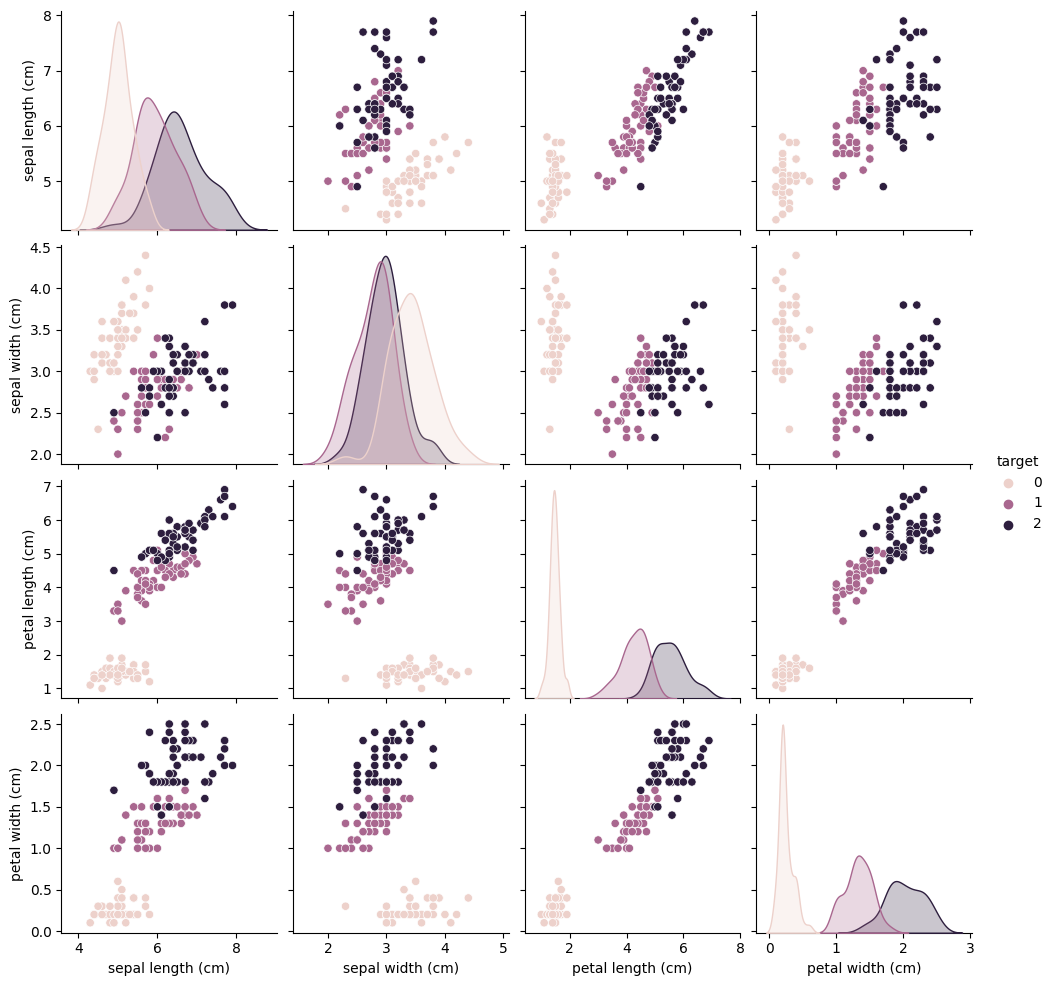

In [7]:
import seaborn as sns
sns.pairplot(df, hue='target')
# sns.pairplot : 비교할 수 있는 것들 다 비교해 줌
# 데이터가 전체적으로 잘 정렬되어 있음을 알 수 있음

In [10]:
data = iris['data'] # 학습집
target = iris['target'] # 정답지

In [11]:
# 표준화 필요
from sklearn.preprocessing import StandardScaler # 특성공학
from sklearn.model_selection import train_test_split # 시험데이터 
from sklearn.neighbors import KNeighborsClassifier # 분류모델
from sklearn.linear_model import LogisticRegression # 선형모델 중 로지스틱 회귀 모델

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler() # ss = 표준화 라이브러리
train_scaled = ss.fit_transform(train_input) # train의 표준화
test_scaled = ss.transform(test_input) # test의 표준화

knn = KNeighborsClassifier(n_neighbors=3) # 다수결 = 3
knn.fit(train_scaled, train_target) # 학습
knn.score(test_scaled, test_target) # 평가
# 정확도 97%

0.9736842105263158

In [13]:
test_target

array([1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2])

In [12]:
knn.predict(test_scaled)

array([1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2])

In [14]:
knn.predict_proba(test_scaled)
# 나올 수 있는 확률 계산
# 0, 33 %, 66 %, 1(100%) 밖에 없음 
# n_neighbors=3 이라 0,1,2,3 밖에 없어서 0, 33, 66, 1밖에 안나옴
# 좋은 모델이라고 하기는 어려움

array([[0.        , 0.66666667, 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.

In [20]:
# 더 정확한 확률을 알고 싶으면 로지스틱 회귀 쓰면 됨
# 로지스틱 회귀 : 시그모이드에 선형회귀를 넣어 정확한 표현 가능
from sklearn.preprocessing import StandardScaler # 특성공학
from sklearn.model_selection import train_test_split # 시험데이터 
from sklearn.neighbors import KNeighborsClassifier # 분류모델
from sklearn.linear_model import LogisticRegression # 선형모델 중 로지스틱 회귀 모델

train_input, test_input, train_target, test_target = train_test_split(data, target) #시험데이터 작성, 순서 중요

ss = StandardScaler() # ss = 표준화 라이브러리
train_scaled = ss.fit_transform(train_input) # train의 표준화
test_scaled = ss.transform(test_input) # test의 표준화

knn = LogisticRegression() # 로지스틱 
knn.fit(train_scaled, train_target) # 학습
knn.score(test_scaled, test_target) # 평가

0.9473684210526315

In [21]:
test_target

array([2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [22]:
knn.predict(test_scaled)

array([2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [18]:
knn.predict_proba(test_scaled)
# [ ]안의 값 다 더하면 1
# 

array([[5.35892425e-05, 3.42235641e-02, 9.65722847e-01],
       [1.36926166e-03, 2.70742162e-01, 7.27888576e-01],
       [9.88831193e-01, 1.11684198e-02, 3.87668918e-07],
       [7.10447999e-04, 5.97925587e-02, 9.39496993e-01],
       [1.54222427e-03, 5.97447541e-01, 4.01010235e-01],
       [2.22267577e-02, 6.59714112e-01, 3.18059130e-01],
       [1.33595137e-02, 8.28239673e-01, 1.58400813e-01],
       [4.85355879e-02, 8.77268694e-01, 7.41957179e-02],
       [9.96429903e-01, 3.56998389e-03, 1.12817288e-07],
       [1.36926166e-03, 2.70742162e-01, 7.27888576e-01],
       [9.71220794e-01, 2.87780815e-02, 1.12417631e-06],
       [7.54716906e-02, 8.76966485e-01, 4.75618246e-02],
       [9.95910912e-01, 4.08900359e-03, 8.40661142e-08],
       [1.46651061e-03, 2.67127697e-01, 7.31405792e-01],
       [8.65608707e-04, 2.54214194e-01, 7.44920197e-01],
       [9.85872870e-01, 1.41253808e-02, 1.74928719e-06],
       [3.69394291e-02, 9.39371430e-01, 2.36891411e-02],
       [9.78585674e-01, 2.14135

In [23]:
import numpy as np
np.round(knn.predict_proba(test_scaled),2) 
# round(데이터, 반올림 자리) : 반올림하는 함수
# 2번째 자리까지 반올림
# 세토사, 버지컬러, 버지니카가 나올 확률
# 맨앞의 데이터 = 세토사 확률, 두번째 = 버지컬러 확률, 세번째 = 버지니카 나올 확률

array([[0.  , 0.06, 0.94],
       [0.98, 0.02, 0.  ],
       [0.  , 0.35, 0.65],
       [0.  , 0.02, 0.98],
       [0.95, 0.05, 0.  ],
       [0.  , 0.41, 0.59],
       [0.  , 0.04, 0.96],
       [0.99, 0.01, 0.  ],
       [0.  , 0.06, 0.94],
       [0.03, 0.86, 0.11],
       [0.02, 0.87, 0.1 ],
       [0.98, 0.02, 0.  ],
       [0.05, 0.94, 0.01],
       [0.03, 0.94, 0.03],
       [0.01, 0.38, 0.61],
       [0.02, 0.88, 0.1 ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.02, 0.98],
       [0.  , 0.02, 0.98],
       [0.  , 0.6 , 0.4 ],
       [0.  , 0.03, 0.97],
       [0.  , 0.02, 0.98],
       [0.  , 0.03, 0.97],
       [0.  , 0.06, 0.94],
       [0.  , 0.07, 0.93],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.01, 0.72, 0.27],
       [0.  , 0.02, 0.98],
       [0.  , 0.02, 0.98],
       [0.01, 0.82, 0.18],
       [0.01, 0.86, 0.12],
       [0.02, 0.77, 0.21],
       [0.04, 0.87, 0.09],
       [0.06, 0.69, 0.25],
       [0.97, 0.03, 0.  ],
 

In [24]:
import numpy as np
np.round(knn.predict_proba(test_scaled),3)

array([[0.   , 0.06 , 0.94 ],
       [0.982, 0.018, 0.   ],
       [0.005, 0.349, 0.646],
       [0.   , 0.016, 0.984],
       [0.952, 0.048, 0.   ],
       [0.001, 0.408, 0.591],
       [0.   , 0.039, 0.961],
       [0.989, 0.011, 0.   ],
       [0.   , 0.062, 0.938],
       [0.03 , 0.858, 0.112],
       [0.023, 0.873, 0.105],
       [0.985, 0.015, 0.   ],
       [0.051, 0.935, 0.014],
       [0.035, 0.937, 0.029],
       [0.012, 0.382, 0.605],
       [0.017, 0.88 , 0.103],
       [0.972, 0.028, 0.   ],
       [0.   , 0.007, 0.993],
       [0.   , 0.018, 0.982],
       [0.   , 0.016, 0.984],
       [0.001, 0.603, 0.396],
       [0.   , 0.026, 0.974],
       [0.   , 0.024, 0.976],
       [0.   , 0.028, 0.972],
       [0.   , 0.058, 0.942],
       [0.   , 0.072, 0.928],
       [0.956, 0.044, 0.   ],
       [0.967, 0.033, 0.   ],
       [0.006, 0.722, 0.272],
       [0.   , 0.018, 0.982],
       [0.   , 0.02 , 0.98 ],
       [0.006, 0.817, 0.177],
       [0.012, 0.864, 0.125],
       [0.